In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

C:\Users\Julian\AppData\Local\Temp\ipykernel_3548\1193203614.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df_train= r"C:\Users\Julian\Desktop\Coding Stuff\Machine Learning\Corona NLP\Corona_NLP_train.csv"
df_train= pd.read_csv(df_train, encoding='latin-1')
df_test = r"C:\Users\Julian\Desktop\Coding Stuff\Machine Learning\Corona NLP\Corona_NLP_test.csv"
df_test = pd.read_csv(df_test, encoding='latin-1')

df = pd.concat([df_test, df_train], ignore_index=True)
df.reset_index()

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...,...
44950,44950,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
44951,44951,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
44952,44952,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
44953,44953,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [4]:
df = df.drop(['UserName', 'ScreenName', 'Location', 'TweetAt'], axis=1)
df

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...
44950,Airline pilots offering to stock supermarket s...,Neutral
44951,Response to complaint not provided citing COVI...,Extremely Negative
44952,You know itÂs getting tough when @KameronWild...,Positive
44953,Is it wrong that the smell of hand sanitizer i...,Neutral


In [5]:
# GOING TO USE VECTORIZE TO SPEED UP SENTIMENT CLASSIFIER
New = []
def SentConvert(Sent):
    if Sent == 'Extremely Negative':
        Sent = 1
    elif Sent == 'Negative':
        Sent = 2
    elif Sent == 'Neutral':
        Sent = 3
    elif Sent == 'Positive':
        Sent = 4
    elif Sent == 'Extremely Positive':
        Sent = 5
    New.append(Sent)
np.vectorize(SentConvert)(df['Sentiment'])
New.pop(0)
New = pd.Series(New)
df = df.drop('Sentiment', axis=1)
df = pd.concat([df, New], axis=1, ignore_index=True)
df.columns = ['OriginalTweet', 'Sentiment']
df


,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,1
1,When I couldn't find hand sanitizer at Fred Me...,4
2,Find out how you can protect yourself and love...,5
3,#Panic buying hits #NewYork City as anxious sh...,2
4,#toiletpaper #dunnypaper #coronavirus #coronav...,3
...,...,...
44950,Airline pilots offering to stock supermarket s...,3
44951,Response to complaint not provided citing COVI...,1
44952,You know itÂs getting tough when @KameronWild...,4
44953,Is it wrong that the smell of hand sanitizer i...,3


In [6]:
def clean(text, pattern):
    r = re.findall(pattern, text)
    for i in r:
        text = re.sub(i, '', text)
    return text

In [7]:
df['KeyTweet'] = np.vectorize(clean)(df['OriginalTweet'],'@[\w]*')
df['KeyTweet'] = df['KeyTweet'].str.replace('[^a-zA-Z#]', ' ')
df['KeyTweet'] = df['KeyTweet'].apply(lambda df: ' '.join([w for w in df.split() if len(w)>3]))
df['KeyTweet'] = np.vectorize(clean)(df['KeyTweet'], 'Â')
df['KeyTweet'] = np.vectorize(clean)(df['KeyTweet'],'#')
df['KeyTweet'] = np.vectorize(clean)(df['KeyTweet'],'')
df

,OriginalTweet,Sentiment,KeyTweet
0,TRENDING: New Yorkers encounter empty supermar...,1,TRENDING: Yorkers encounter empty supermarket ...
1,When I couldn't find hand sanitizer at Fred Me...,4,"When couldn't find hand sanitizer Fred Meyer, ..."
2,Find out how you can protect yourself and love...,5,Find protect yourself loved ones from coronavi...
3,#Panic buying hits #NewYork City as anxious sh...,2,Panic buying hits NewYork City anxious shopper...
4,#toiletpaper #dunnypaper #coronavirus #coronav...,3,toiletpaper dunnypaper coronavirus coronavirus...
...,...,...,...
44950,Airline pilots offering to stock supermarket s...,3,Airline pilots offering stock supermarket shel...
44951,Response to complaint not provided citing COVI...,1,Response complaint provided citing COVID-19 re...
44952,You know itÂs getting tough when @KameronWild...,4,know its getting tough when rationing toilet p...
44953,Is it wrong that the smell of hand sanitizer i...,3,wrong that smell hand sanitizer starting turn ...


In [8]:
# Drop all instances of 'https'
for i in range(len(df)):
    df.iloc[i,2] = (re.sub(r'https\S+', '', df.iloc[i,2]))
print(df.iloc[1,2])
df

When couldn't find hand sanitizer Fred Meyer, turned Amazon. $114.97 pack Purell??!!Check coronavirus concerns driving prices. 


,OriginalTweet,Sentiment,KeyTweet
0,TRENDING: New Yorkers encounter empty supermar...,1,TRENDING: Yorkers encounter empty supermarket ...
1,When I couldn't find hand sanitizer at Fred Me...,4,"When couldn't find hand sanitizer Fred Meyer, ..."
2,Find out how you can protect yourself and love...,5,Find protect yourself loved ones from coronavi...
3,#Panic buying hits #NewYork City as anxious sh...,2,Panic buying hits NewYork City anxious shopper...
4,#toiletpaper #dunnypaper #coronavirus #coronav...,3,toiletpaper dunnypaper coronavirus coronavirus...
...,...,...,...
44950,Airline pilots offering to stock supermarket s...,3,Airline pilots offering stock supermarket shel...
44951,Response to complaint not provided citing COVI...,1,Response complaint provided citing COVID-19 re...
44952,You know itÂs getting tough when @KameronWild...,4,know its getting tough when rationing toilet p...
44953,Is it wrong that the smell of hand sanitizer i...,3,wrong that smell hand sanitizer starting turn ...


In [9]:
# Drop all empy sets
Drop = []
for i in range(len(df)):
    if len(df.iloc[i,2]) == 0:
        Drop.append(i)
for i in reversed(range(len(Drop))):
    df = df.drop(int(Drop[i]), axis=0)

In [10]:
# DROPPING THAT ONE ROW CAUSE REASONS
df = df.reset_index(drop=True)
df = df.drop([3796], axis=0)
df = df.reset_index(drop=True)

In [11]:
AllWords = ' '.join([text for text in df['KeyTweet']])
NegWords = ' '.join([text for text in df['KeyTweet'][df['Sentiment']== (1 and 2)]])
NeutralWords = ' '.join([text for text in df['KeyTweet'][df['Sentiment']== (3)]])
PosWords = ' '.join([text for text in df['KeyTweet'][df['Sentiment']== (4 and 5)]])

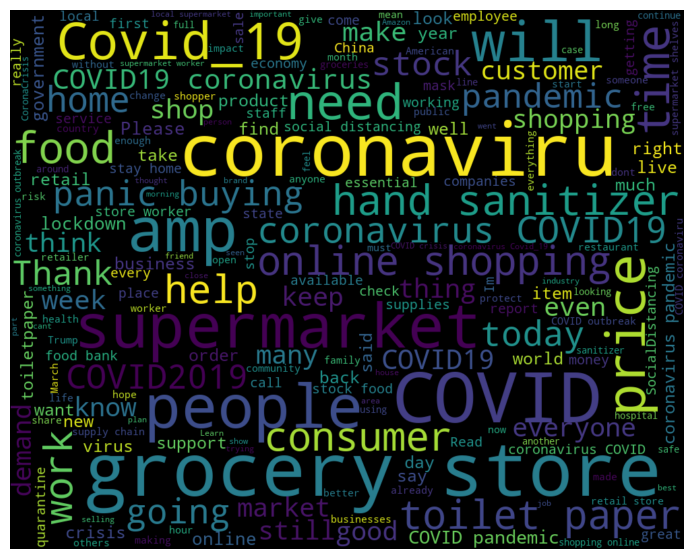

In [12]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=800, random_state=21, max_font_size=110).generate(AllWords)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

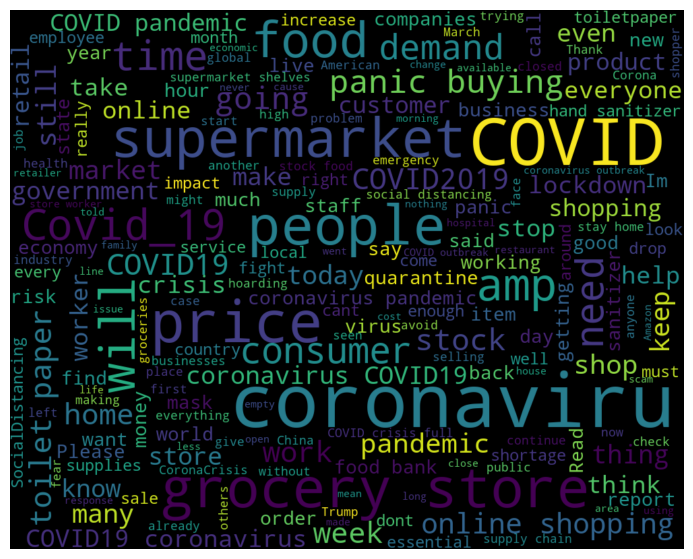

In [13]:
wordcloud = WordCloud(width=1000, height=800, random_state=21, max_font_size=110).generate(NegWords)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

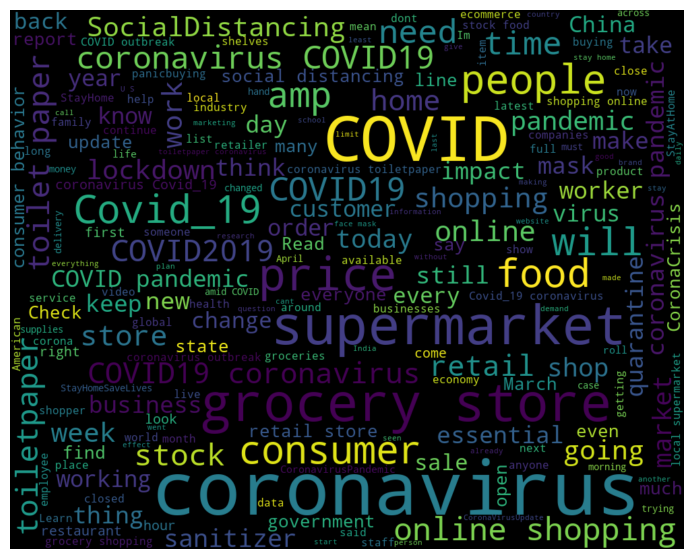

In [14]:
wordcloud = WordCloud(width=1000, height=800, random_state=21, max_font_size=110).generate(NeutralWords)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

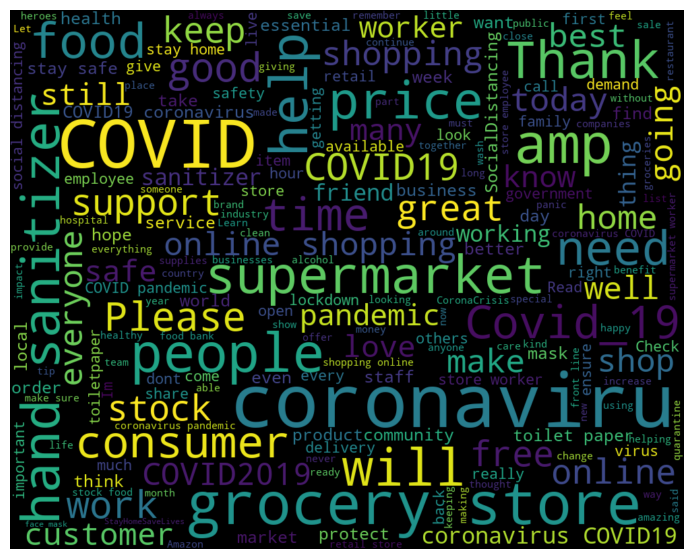

In [15]:
wordcloud = WordCloud(width=1000, height=800, random_state=21, max_font_size=110).generate(PosWords)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
# # Negative tweets (THIS IS FOR THE BARPLOT WHICH IDK IF IM GOING TO USE)
# NegativeTweets = nltk.FreqDist(df['Sentiment']==(1 and 2))
# df1 = pd.DataFrame({''})

In [17]:
SegmentedTweet = df['KeyTweet'].apply(lambda x:x.split())

In [18]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
SegmentedTweet = SegmentedTweet.apply(lambda x: [stemmer.stem(i) for i in x])


In [19]:
SegmentedTweet.head()

0    [trending:, yorker, encount, empti, supermarke...
1    [when, couldn't, find, hand, sanit, fred, meye...
2    [find, protect, yourself, love, one, from, cor...
3    [panic, buy, hit, newyork, citi, anxiou, shopp...
4    [toiletpap, dunnypap, coronaviru, coronavirusa...
Name: KeyTweet, dtype: object

In [20]:
for i in range(len(SegmentedTweet)):
    SegmentedTweet[i] = ' '.join(SegmentedTweet[i])
df['KeyTweet'] = SegmentedTweet

In [21]:
df.head()

,OriginalTweet,Sentiment,KeyTweet
0,TRENDING: New Yorkers encounter empty supermar...,1,trending: yorker encount empti supermarket she...
1,When I couldn't find hand sanitizer at Fred Me...,4,"when couldn't find hand sanit fred meyer, turn..."
2,Find out how you can protect yourself and love...,5,find protect yourself love one from coronavirus.
3,#Panic buying hits #NewYork City as anxious sh...,2,panic buy hit newyork citi anxiou shopper stoc...
4,#toiletpaper #dunnypaper #coronavirus #coronav...,3,toiletpap dunnypap coronaviru coronavirusaustr...


In [22]:
AllWords = ' '.join([text for text in df['KeyTweet']])
NegWords = ' '.join([text for text in df['KeyTweet'][df['Sentiment']== (1 and 2)]])
NeutralWords = ' '.join([text for text in df['KeyTweet'][df['Sentiment']== (3)]])
PosWords = ' '.join([text for text in df['KeyTweet'][df['Sentiment']== (4 and 5)]])

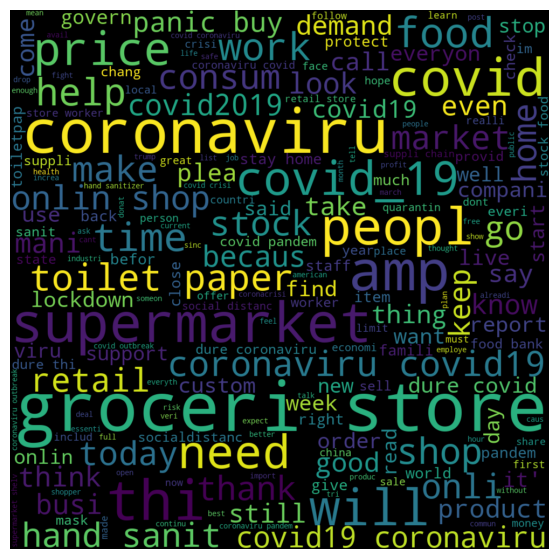

In [23]:
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=210).generate(AllWords)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

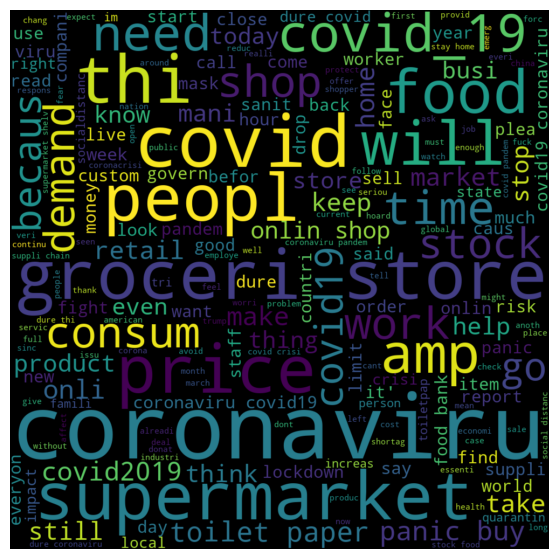

In [24]:
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=210).generate(NegWords)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

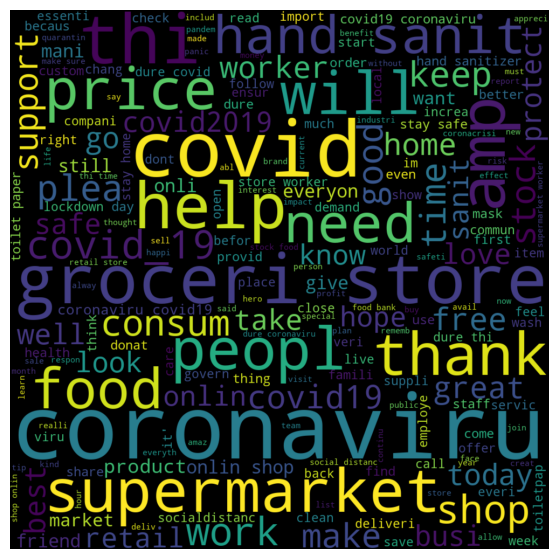

In [25]:
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=210).generate(PosWords)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

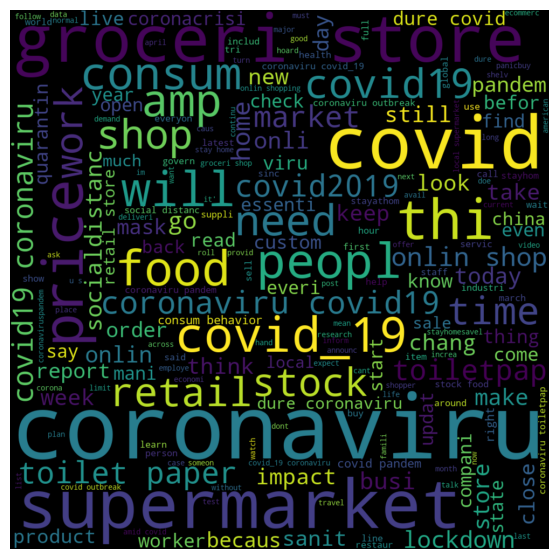

In [27]:
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=210).generate(NeutralWords)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [29]:
bow_vectorizer = CountVectorizer()
bow = bow_vectorizer.fit_transform(df['KeyTweet'])
bow.shape

(44934, 42706)

In [30]:
df = df.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(bow, df['Sentiment'], test_size=0.2, random_state=13)

In [31]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (35947, 42706)
X_test shape:  (8987, 42706)
y_train shape:  (35947,)
y_test shape:  (8987,)


In [32]:
# USING MULTINOMIAL NAIVE BAYES CLASSIFIER
Naive = MultinomialNB().fit(X_train, y_train)
PredictedNaive = Naive.predict(X_test)

In [33]:
# MAKING A CONFUSIN MATRIX
from sklearn.metrics import confusion_matrix

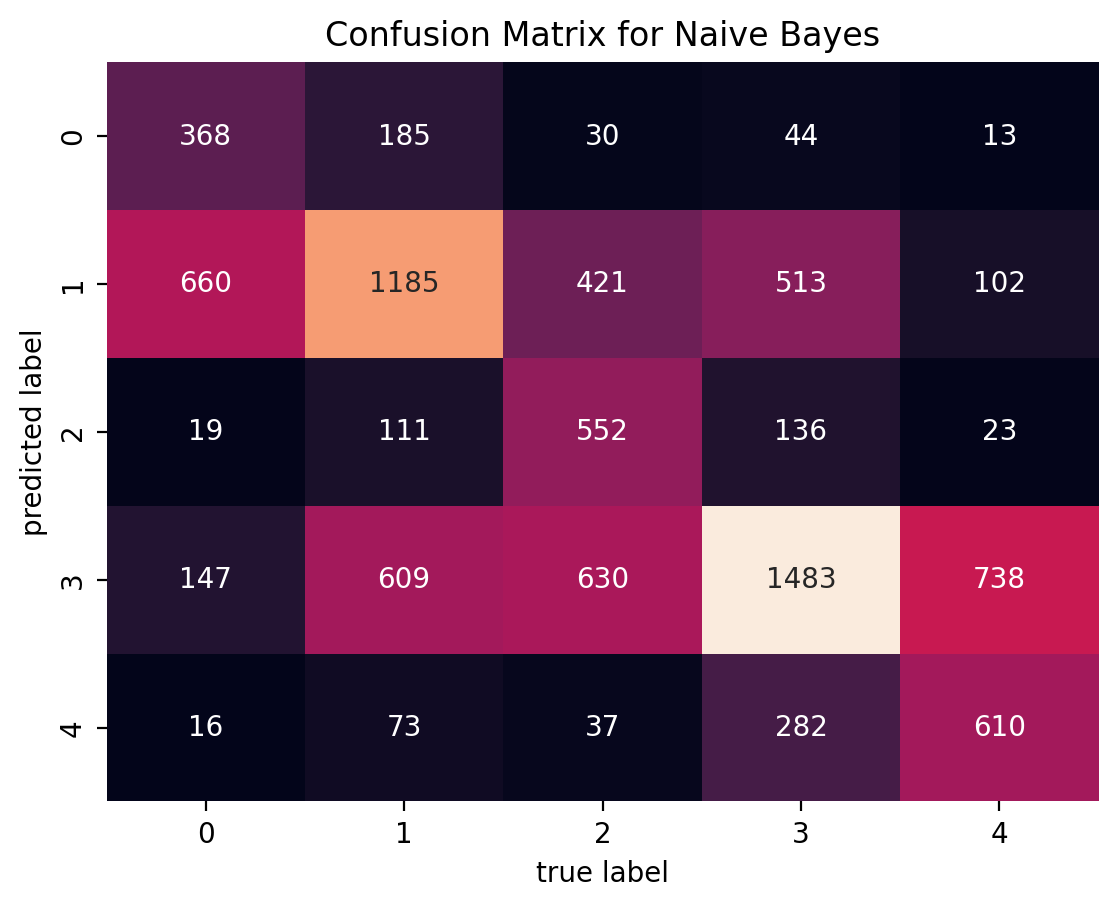

In [34]:
plt.figure(dpi=200)
mat = confusion_matrix(y_test, PredictedNaive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

# plt.figure(figsize=(10,7))
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [35]:
from sklearn.metrics import accuracy_score

ScoreNaive = accuracy_score(PredictedNaive, y_test)
print('Accuracy with Naive Bayes: ', ScoreNaive)

Accuracy with Naive Bayes:  0.467119172137532
